<a href="https://colab.research.google.com/github/MRUNIQUEGUPTA/Intern_Task/blob/main/Financial_Transactions_Anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from scipy import stats

In [ ]:
df = pd.read_excel("/content/given_data.xlsx")

In [ ]:
df

,transaction_id,date,category,amount
0,TRX001,2024-06-01,Food,25
1,TRX002,2024-06-01,Utilities,150
2,TRX003,2024-06-01,Entertainment,200
3,TRX004,2024-06-02,Food,3000
4,TRX005,2024-06-02,Transport,45
5,TRX006,2024-06-03,Utilities,135
6,TRX007,2024-06-03,Food,20


**Data Pre-Processing**

In [ ]:
#Checking for null values per column
df.isnull().sum()

transaction_id    0
date              0
category          0
amount            0
dtype: int64

In [ ]:
#Handling missing values in the given dataset
for i in df['category'].unique():
  df['amount'][df['category']==i]=(df['amount'][df['category']==i].fillna((df['amount'][df['category']==i]).median()))

<ipython-input-5-b2a2c192c3c5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['amount'][df['category']==i]=(df['amount'][df['category']==i].fillna((df['amount'][df['category']==i]).median()))
<ipython-input-5-b2a2c192c3c5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['amount'][df['category']==i]=(df['amount'][df['category']==i].fillna((df['amount'][df['category']==i]).median()))
<ipython-input-5-b2a2c192c3c5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

In [ ]:
#Verify there are no missing values left
df.isnull().sum()

transaction_id    0
date              0
category          0
amount            0
dtype: int64

**Basic Statistical Analysis**

In [ ]:
#Shape of the Dataset
df.shape

(7, 4)

In [ ]:
#statistical description of the dataset
df.describe()

,date,amount
count,7,7.000000
mean,2024-06-01 20:34:17.142857216,510.714286
min,2024-06-01 00:00:00,20.000000
25%,2024-06-01 00:00:00,35.000000
50%,2024-06-02 00:00:00,135.000000
75%,2024-06-02 12:00:00,175.000000
max,2024-06-03 00:00:00,3000.000000
std,NaN,1099.846310


In [ ]:
#Basic Information about the datset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  7 non-null      object        
 1   date            7 non-null      datetime64[ns]
 2   category        7 non-null      object        
 3   amount          7 non-null      int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 352.0+ bytes


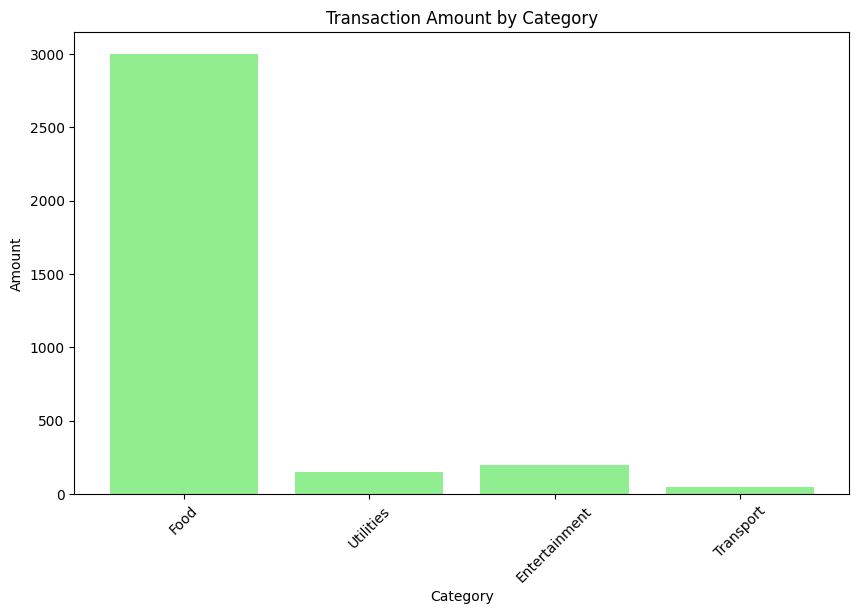

In [ ]:
# Bar plot of transaction amounts by category
plt.figure(figsize=(10, 6))
plt.bar(df['category'],df['amount'],color = 'lightgreen')
plt.xlabel('Category')
plt.ylabel('Amount')
plt.title('Transaction Amount by Category')
plt.xticks(rotation=45)
plt.show()

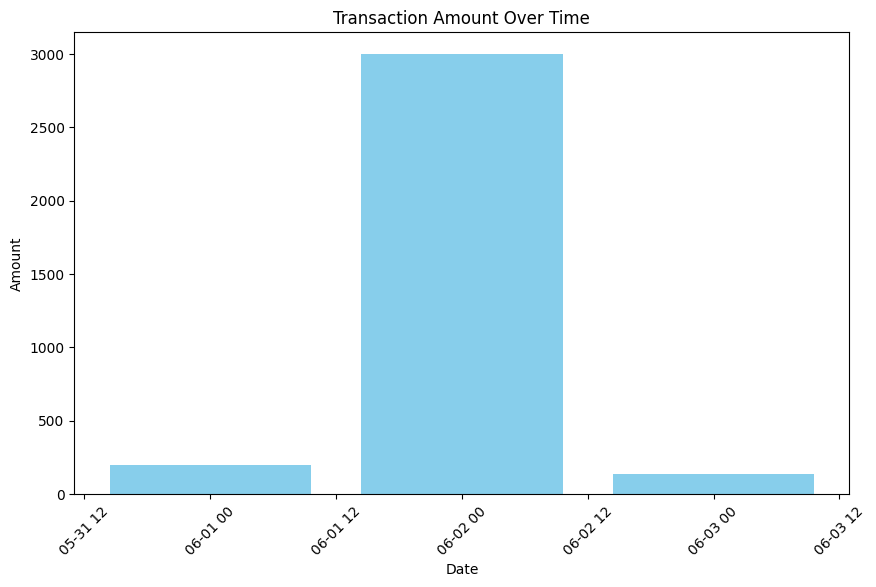

In [ ]:
# Bar plot of transaction amounts over time
plt.figure(figsize=(10, 6))
plt.bar(df['date'],df['amount'],color = 'skyblue')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.title('Transaction Amount Over Time')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Calculate mean and standard deviation for each category
for i in df['category'].unique():
  avg_amount = df['amount'][df['category']==i].mean()
  std_amount = df['amount'][df['category']==i].std()
  print(f"mean amount for category {i} is {avg_amount} and standard deviation for category {i} is {std_amount}")

mean amount for category Food is 1015.0 and standard deviation for category Food is 1719.0622443646419
mean amount for category Utilities is 142.5 and standard deviation for category Utilities is 10.606601717798213
mean amount for category Entertainment is 200.0 and standard deviation for category Entertainment is nan
mean amount for category Transport is 45.0 and standard deviation for category Transport is nan


In [ ]:
df['z_score'] = df.groupby('category')['amount'].transform(lambda x: stats.zscore(x))
anomalies = df[np.abs(df['z_score']) > 2]

In [ ]:
print("\nDetected Anomalies:")
print(anomalies[['transaction_id', 'date', 'category', 'amount', 'z_score']])


Detected Anomalies:
Empty DataFrame
Columns: [transaction_id, date, category, amount, z_score]
Index: []


In [ ]:
# Generate a detailed anomaly report
anomaly_report = anomalies[['transaction_id', 'date', 'category', 'amount', 'z_score']].copy()
anomaly_report['reason_for_anomaly'] = 'Z-score > 2'

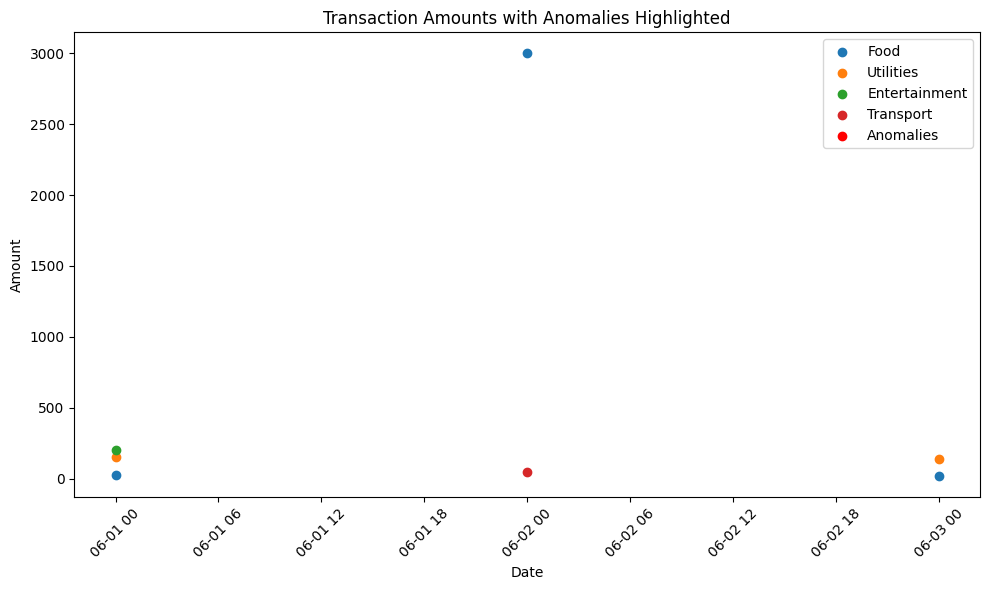

In [ ]:

# Visualize the anomalies
plt.figure(figsize=(10, 6))
for category in df['category'].unique():
    subset = df[df['category'] == category]
    plt.scatter(subset['date'], subset['amount'], label=category)
anomaly_points = anomalies[['date', 'amount']].values
plt.scatter(anomaly_points[:, 0], anomaly_points[:, 1], color='red', label='Anomalies')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.title('Transaction Amounts with Anomalies Highlighted')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

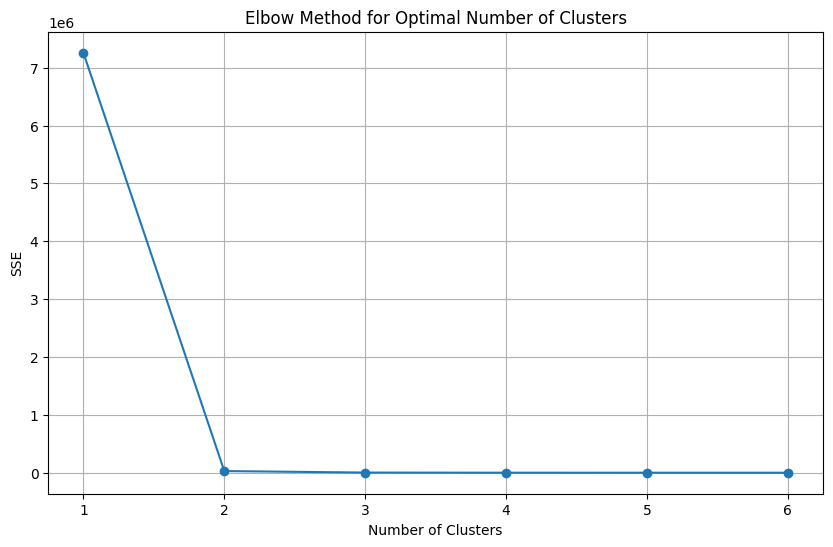

In [ ]:
#Methodology to detect anomaly
dff= np.reshape(df['amount'].values, (df.shape[0], 1))
sse = []
for k in range(1, 7):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(dff)
    sse.append(kmeans.inertia_)

#visualize results for the elbow method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 7), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.grid(True)
plt.show()

**I am using the elbow method to get the optimal number of clusters.From the graaph we can clearly see that the optimal number of clusters is 2.**

In [ ]:
kmeans = KMeans(init="random", n_clusters=2, n_init=10, random_state=1)
kmeans.fit(dff)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

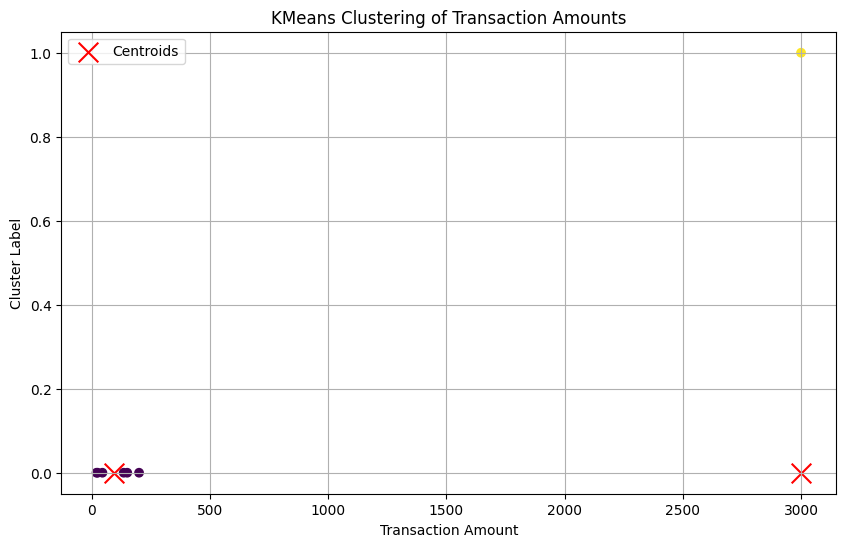

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(dff, labels, c=labels, cmap='viridis', marker='o')
plt.scatter(centroids, np.zeros_like(centroids), marker='x', color='red', s=200, label='Centroids')
plt.xlabel('Transaction Amount')
plt.ylabel('Cluster Label')
plt.title('KMeans Clustering of Transaction Amounts')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
z_score_threshold= 1.3

In [ ]:
# Anomaly Detection using Z-score
df['z_score'] = df.groupby('category')['amount'].transform(lambda x: stats.zscore(x))
anomalies = df[np.abs(df['z_score']) > float(f"{z_score_threshold}")]

**I am using z-score method to detect anomalies.I have used z-score values/threshold as 1.3 which means transactions that are 1.3 standard deviations away from mean.According to the given dataset this was coming as the highest and we can chaneg the z-value threshold as the dataset will grow.**

In [ ]:
print("\nDetected Anomalies:")
print(anomalies[['transaction_id', 'date', 'category', 'amount', 'z_score']])


Detected Anomalies:
  transaction_id       date category  amount   z_score
3         TRX004 2024-06-02     Food    3000  1.414212


In [ ]:
# Generate a detailed anomaly report
anomaly_report = anomalies[['transaction_id', 'date', 'category', 'amount', 'z_score']].copy()
anomaly_report['reason_for_anomaly'] = f"This transaction has Z-score > {z_score_threshold}"

In [ ]:
anomaly_report

,transaction_id,date,category,amount,z_score,reason_for_anomaly
3,TRX004,2024-06-02,Food,3000,1.414212,This transaction has Z-score > 1.3


In [ ]:
# Save the report to a CSV file
anomaly_report.to_csv('anomaly_report.csv', index=False)
print("\nAnomaly report saved as 'anomaly_report.csv'")


Anomaly report saved as 'anomaly_report.csv'
